# Introduction
The Perceptron is one of the earliest and simplest supervised learning algorithms, used for binary classification. It works by finding a linear decision boundary that separates two classes of data, updating weights iteratively when misclassifications occur.

In this project, we apply the Perceptron algorithm to the Banknote Authentication dataset from the UCI repository. The goal is to classify banknotes as genuine (0) or forged (1) based on four statistical features extracted from images of the banknotes.

In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.1.2 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 



{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [18]:

df = X.copy()
df['class'] = y 

df.to_csv("banknote_authentication.csv", index=False)


# Data Overview

In [16]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Load dataset
data = fetch_ucirepo(id=267)
X = data.data.features
y = data.data.targets.squeeze()

# Preview
print("Feature columns:", X.columns.tolist())
print("Target distribution:\n", y.value_counts())
X.head()


Feature columns: ['variance', 'skewness', 'curtosis', 'entropy']
Target distribution:
 class
0    762
1    610
Name: count, dtype: int64


,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


Variable descriptions:
variance, skewness, curtosis, entropy — Statistical features from wavelet-transformed images

class — Target variable (0 = genuine, 1 = forged)



In [11]:
y_binary = y.squeeze().replace({0: -1, 1: 1}) 


# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Perceptron Algorithm Implementation

In [13]:
import numpy as np

def perceptron(X, y, max_iter=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for _ in range(max_iter):
        for i in range(n_samples):
            if y[i] * (np.dot(w, X[i]) + b) <= 0:
                w += y[i] * X[i]
                b += y[i]
    return w, b

w, b = perceptron(X_scaled, y_binary.values)


# Predictions and Accuracy

In [14]:
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

y_pred = predict(X_scaled, w, b)


In [15]:
from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_binary, y_pred))


Training Accuracy: 0.9817784256559767


# Visualization with PCA
To visualize the classification boundary and data separability, we use Principal Component Analysis (PCA) to reduce the feature space to 2D.

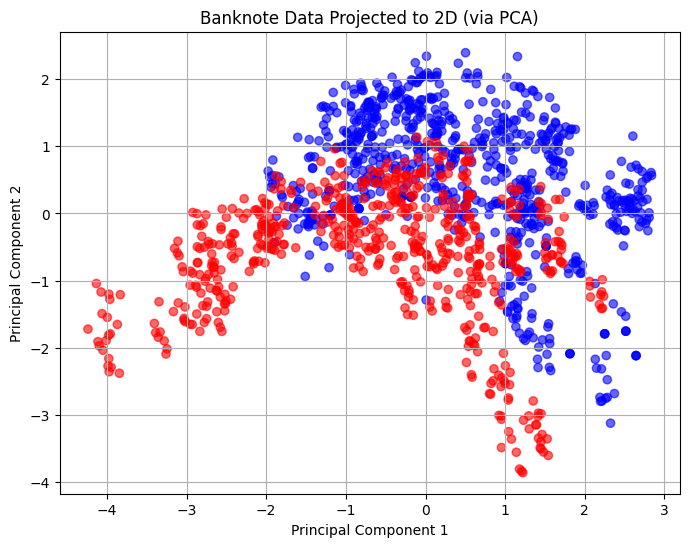

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary, cmap='bwr', alpha=0.6)
plt.title("Banknote Data Projected to 2D (via PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


### PCA Visualization Analysis

The PCA projection to two dimensions reveals that the **genuine** and **forged** banknotes (visualized in red and blue, respectively) are **fairly well-separated**, although not perfectly linearly separable.

- The **first principal component (PC1)** captures the main axis of variance in the data, spreading the points horizontally.
- The **second principal component (PC2)** adds complementary variance, vertically dispersing the data.
- The **blue points (class +1: forged)** are mostly concentrated on the right-upper region, while the **red points (class -1: genuine)** are more spread toward the left and lower areas.

While some overlap exists in the central region, the overall distribution suggests that the dataset is **approximately linearly separable**, which aligns with the **high accuracy** achieved by the Perceptron model during training.

This supports the suitability of the Perceptron for this problem, especially considering the low-dimensional feature space and the absence of significant class imbalance.


# Conclusion
The Perceptron algorithm achieved high accuracy on the Banknote Authentication dataset. As the classes are linearly separable, the classic Perceptron performs well without the need for advanced models. The PCA visualization confirms that the two classes are distinguishable in reduced dimensions.
